In [1]:
# Standard Data Science Utility Belt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# User defined methods
#from wrangle import wrangle, wrangle_explore
from acquire import acquire,team_data_list
#from functions import get_data_dictionary

# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 
pd.reset_option("display.max_rows", "display.max_columns")

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Project Planning

### Project and Goals

    Coming Soon...

### Original Hypothesis

    Coming Soon...

### Domain Knowledge Quick Tip
    
    Coming Soon...
    

### The Plan

    Setup the environment, create a new repository, update the .gitignore, create a README.md with the data and common termonology dictionaries, create a trello board, come up with an original hypothesis and setup a morning standup living document.
    
    Acquire the data using the riot API.
    
    Clean the data, drop any useless features, remove duplicate observations, double check data-types, find any null values, decide what do with null values, and encode the features.
    
    Split the Data, into three data sets named train, validate, and test.
    
    Explore the data, look through the graphs and evaluate each feature to find drivers of predicting win rates.  Exploration will also include two hypotheses, setting of alpha, statistical tests, rejecting or failing to reject the null hypothesis, and documentation of the findings and takeaways.
    
    Create Models, create three machine learning models plus a baseline model.  Will be using a DecisionTreeClassifier, RandomForestClassifier, and KNeighborsClassifier.  Evaluate models on train and validate datasets.  Pick the model with highest validate accuracy to run on my final test data.
    
    Wrap it up, document conclusions, recommendations, and take aways in the final report notebook.  Create a presentation. 

# Executive Summary - Conclusions & Next Steps

### Conclusion
    Coming Soon...

### Recommendations

    The Data Suggests: 
    
    Coming Soon... 

### Key Takeaways

    - Coming Soon

# Data Acquisition (Jared)

In [2]:
df = acquire()

In [3]:
### .info(), .head(), .describe()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736 entries, 0 to 4735
Data columns (total 210 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    Unnamed: 0                              int64  
 1    assistsplayer_1                         float64
 2    assistsplayer_10                        float64
 3    assistsplayer_2                         float64
 4    assistsplayer_3                         float64
 5    assistsplayer_4                         float64
 6    assistsplayer_5                         float64
 7    assistsplayer_6                         float64
 8    assistsplayer_7                         float64
 9    assistsplayer_8                         float64
 10   assistsplayer_9                         float64
 11   baron_team100                           float64
 12   baron_team200                           float64
 13   currentGold_1                           float64
 14   currentGold_10        

In [4]:
df.head()

,Unnamed: 0,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,baron_team200,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,gameMode,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_7,killsplayer_8,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,riftherald_team200,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,inhibs_lost_team100,killsplayer_6,killsplayer_9,riftherald_team100,ward_player_0,killsplayer_0,riftherald_team300,team_deathsplayer_100,team_deathsplayer_200,team_goldPerSecond_100,team_goldPerSecond_200,team_jungleMinionsKilled_100,team_jungleMinionsKilled_200,team_killsplayer_100,team_killsplayer_200,team_level_100,team_level_200,team_magicDamageDoneToChampions_100,team_magicDamageDoneToChampions_200,team_minionsKilled_100,team_minionsKilled_200,team_physicalDamageDoneToChampions_100,team_physicalDamageDoneToChampions_200,team_timeEnemySpentControlled_100,team_timeEnemySpentControlled_200,team_totalDamageDoneToChampions_100,team_totalDamageDoneToChampions_200,team_totalGold_100,team_totalGold_200,team_trueDamageDoneToChampions_100,team_trueDamageDoneToChampions_200,team_ward_player_100,team_ward_player_200,team_assistsplayer_10

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4736.0,2367.500000,1367.309767,0.0,1183.75,2367.5,3551.25,4735.0
assistsplayer_1,4736.0,2.930321,2.341716,0.0,1.00,2.0,4.00,30.0
assistsplayer_10,4736.0,7.394215,3.802211,0.0,5.00,7.0,10.00,24.0
assistsplayer_2,4736.0,4.597762,2.755842,0.0,3.00,4.0,6.00,20.0
assistsplayer_3,4736.0,3.631334,2.567044,0.0,2.00,3.0,5.00,22.0
...,...,...,...,...,...,...,...,...
team_assistsplayer_100,4736.0,22.425042,9.625088,1.0,15.00,21.0,28.00,78.0
team_assistsplayer_200,4736.0,22.753378,9.330197,0.0,16.00,22.0,28.00,68.0
team_xp_100,4736.0,41280.069679,2970.830248,28840.0,39244.00,41169.0,43267.25,51306.0
team_xp_200,4736.0,41596.443834,3022.226509,31467.0,39476.50,41534.5,43648.00,52307.0


### Distribution - "altitude_mean_meters"

In [6]:
team_data_list

['riftherald_team100',
 'inhibs_lost_team100',
 'team_totalGold_100',
 'team_trueDamageDoneToChampions_100',
 'team_ward_player_100',
 'team_assistsplayer_100',
 'team_xp_100',
 'team_deathsplayer_100',
 'team_jungleMinionsKilled_100',
 'team_killsplayer_100',
 'team_level_100',
 'team_magicDamageDoneToChampions_100',
 'team_minionsKilled_100',
 'team_physicalDamageDoneToChampions_100',
 'team_timeEnemySpentControlled_100']

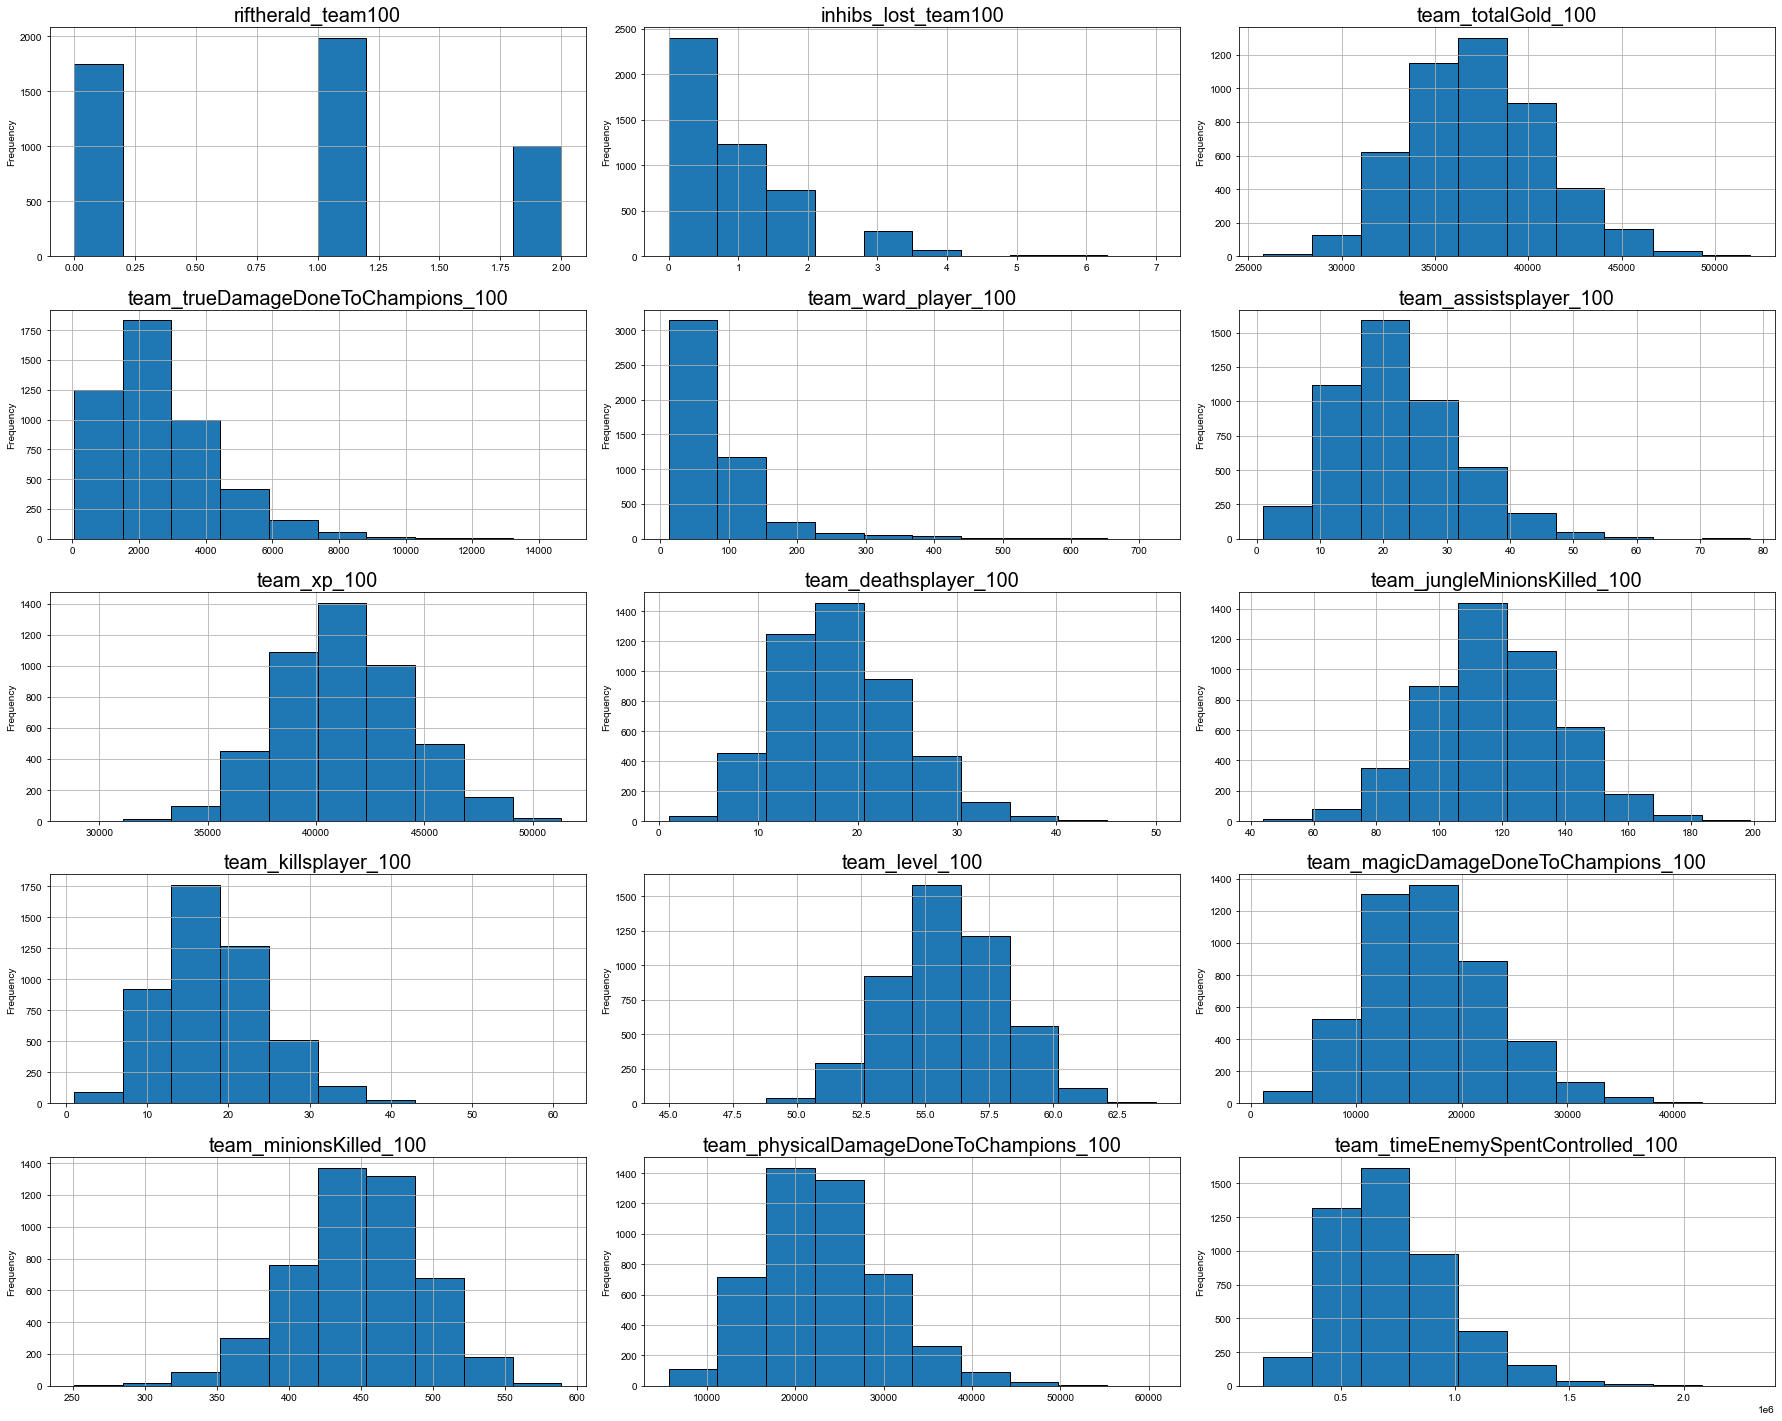

In [7]:
# data distributions for blue team.
fig, axs = plt.subplots(5,3, sharey = False, figsize = (25,20))
axe = axs.ravel()
sns.set(font_scale = 1.25)
for i,col in enumerate(team_data_list):
    p = df[col].plot.hist(ax = axe[i],title = col, ec = 'black',bins = 10)
    p.set_title(col,fontsize = 20)
    plt.tight_layout()

### Data Dictionary
| Feature                    | Datatype                | Definition   |
|:----------------------|:------------------------|:-------------|
| RedTeamKills|int64|Gives a total of the red teams kills.|
| BlueTeamKills|int64|Gives a total of the blue teams kills|
| RedTeamTowerKills|int64|Gives a total of the number of towers taken by the red team|
| BlueTeamTowerKills|int64|Gives a total of the number of towers taken by the blue team|
| RedTeamTowerAssists|int64|Gives the total number of assists on the red team|
| BlueTeamTowerAssists|int64|Gives the total number of assists on the blue team|
| RedTeamAvgLvl|int64|Takes the mean level of all the players on the red team|
| BlueTeamAvgLvl|int64|Takes the mean level of all the players on the blue team|
| RedTeamGoldSpent|int64|Gives a total amount of gold spent by the red team|
| BlueTeamGoldSpent|int64|Gives a total amount of gold spent by the blue team|
| RedTeamDragons|int64|Gives a total number of dragons killed by the red team|
| BlueTeamDragons|int64|Gives a total number of dragons killed by the blue team|
| RedTeamHeralds|int64|Gives a total number of heralds killed by the red team|
| BlueTeamHeralds|int64|Gives a total number of heralds killed by the blue team|
| RedTeamBarons|int64|Gives a total number of barons killed by the red team|
| BlueTeamBarons|int64|Gives a total number of barons killed by the blue team|
| RedTeamInhibTaken|int64|Gives a total number of inhibitors taken by the red team|
| BlueTeamInhibTaken|int64|Gives a total number of inhibitors taken by the blue team|

### Target Feature - 'winningTeam

### Teams code:
- **Team blue = 100.0**
- **Team red = 200.0**

In [8]:
# Target feature was engineered from total.Cup.Points
df['winningTeam'].value_counts()

200.0    2466
100.0    2270
Name: winningTeam, dtype: int64

### Target Distribution

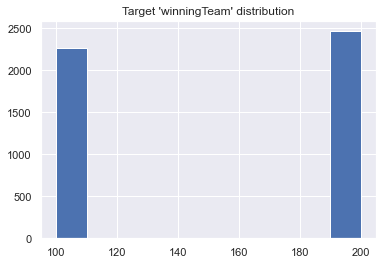

In [9]:
# Graphing the Distribution
sns.set(font_scale = 1)
df.winningTeam.hist()
plt.title("Target 'winningTeam' distribution")
plt.show()

### Acquire takeaway
   - Summoner name were webscraped from popular sites: 
       - https://na.op.gg/ranking/ladder/
       - https://www.trackingthepros.com/players/na/
   - Only selected the data from the top 3000 playes in the North American server.
   - Includes masters, grandmasters, challenger, and pro players.
   - Riot api was used to get puuid numbers from players.
   - Puuid numbers are used to get match lists from the players match histories.
   - The match lists are used to get json files that were prepared into the nice tidy dataframe.

# Prepare

#### Dropped Columns

    These columns got dropped because they didn't offer any value:
    
    Coming Soon...

#### Handle Nulls

    Dropped any row that was missing a value from the following columns:
    
    Coming Soon...
    
    Used the median value to fill in missing values from the following columns:
    
    Coming Soon...

#### Convert Data Types

    Changed the following columns data types:
    
    Coming Soon...

#### Miscellaneous

    - Coming Soon

#### Rename

    Changed the following columns names to something more conventional:
    
    - Coming Soon...

#### Engineered Features

    - Coming Soon...

#### Removed Outliers
    Coming Soon...

#### Scaling
    Coming Soon...

#### Encode

    Created dummy columns for:
    
    Coming Soon...
        

#### Split

    Coming Soon...

### Prepare Takeaway
    
    Coming Soon...

# Exploration (Bryant, Chris)

In [ ]:
# Using wrangle_explore because the values wont be scaled or encoded
train, validate, test = wrangle_explore()

# Univariate

## Original Hypothesis

 - Target = Winning_Team

Questions to research
Univariate Study
- Ward score effects the outcome
- assists effects the outcome 
- damage by magic effects the outcome
- buildings effect the outcome
- xp gained effects the outcome
- number of inhibitors lost effects the outcome
- dragaon team effects the outcome of the game

In [ ]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()
cols = ['BlueTeamAssists','BlueTeamMagicDamageDoneToChampions','winningTeam','BlueTeamXp','towers_lost_team100','inhibs_lost_team200','dragon_team100','BlueTeamWards']
#pairplots 
sns.set(font_scale=.7)
plt.figure(figsize=(12,8))
plot_variable_pairs(train, cols)

In [ ]:
## Heatmap 
sns.set(font_scale=2)
plt.figure(figsize=(22,70))
heatmap = sns.heatmap(train.corr()[['winningTeam']].sort_values(by='winningTeam', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [ ]:
# correlation
sns.set(font_scale=.7)
plt.figure(figsize=(12,10))
correlation_exploration(train, 'BlueTeamWards', 'winningTeam')
# Looks like magice damage done by blue team to champions decreases after 2 inhibitor lost by red team

# Question # 1

    Is the average elevation for a coffee rated 84 or higher different than coffee whos rating is less than 84?

In [ ]:
### Setting up seperate dataframes

# coffee with excellent rating into df_rating
df_rating = train[train['excellent_rating'] == 1]


# coffee with without excellent rating into df_without
df_without = train[train['excellent_rating'] != 1]

In [ ]:
# checking number of values in each
len(df_rating), len(df_without)

### Checking Mean

In [ ]:
# with excellent rating altitude mean
df_rating.altitude_mean_meters.mean()

# witout excellent rating altitude mean
df_without.altitude_mean_meters.mean()

### Checking Median

In [ ]:
# with excellent rating altitude median
df_rating.altitude_mean_meters.median()

# witout excellent rating altitude median
df_without.altitude_mean_meters.median()

### Graph

In [ ]:
# Graphing the average altitude by ratings
rating = ['84 or Higher', 'Less than 84']
rating_mean = [df_rating.altitude_mean_meters.mean(), df_without.altitude_mean_meters.mean()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('Rating',fontsize = 15, )
ax.set_ylabel('Altitude',fontsize = 15)
ax.set_title('Average Altitude by Ratings', fontsize = 15)
sns.set(font_scale = 2)
ax.set(xlabel='Rating', ylabel='Altitude')
plt.show()

### Question 1 At A Glance

    - 84 or higher rated coffee did have a higher altitude_mean_meters mean & median than coffee whos rating was less than 84.  
    - The mean and median were not too far off from one another for both rated and without

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [ ]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    Yes, I seperated excellent rated from non excellent rated

### Normally Distributed?
    - 84 or higher rated coffee altitude mean is normally distributed
    - Less than 84 rated coffee altitude is kind of normally distributed

In [ ]:
# Graphing the altitude mean distribution
sns.set(font_scale = 1)
df_rating.altitude_mean_meters.hist()
plt.title('84+ Altitude Mean Distribution')
plt.show()

In [ ]:
# Graphing the less than 84 rated altitude mean distributioin
df_without.altitude_mean_meters.hist()
plt.title('Less than 84 Rated Altitude Mean Distribution')
plt.show()

### Equal Variances?
    - The leven test concmluded the populations did not have equal variances.

In [ ]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df_rating.altitude_mean_meters, df_without.altitude_mean_meters)
stats, p

In [ ]:
# The small p-value suggests that the populations do not have equal variances.
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

### Mann-Whitney's Test
    Assumptions were not met.  I will use a Non-Parametric Test.

### Hypothesis

### $H_0$: There is no difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee.
### $H_a$: There is a difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee.

In [ ]:
# From stats library using the mannwhitneyu, returning a stats and p value
stat, p = mannwhitneyu(df_rating.altitude_mean_meters, df_without.altitude_mean_meters)
stat, p

if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

### Hypotheis Results
    - There is a difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee

### Question 1 Takeway
    - I have a 95% confidence level that there is a difference in altitude between 84 or higher rated and less than 84 rated coffee.  
    - 84 or higher rated coffee has a higher mean/median altitude than less than 84 rated coffee
    - altitude_mean_meters seems to be a good fit or useful for modeling.  I will include it in my models and see if this is true. 

# Question 2

    Is the average bag_weight for a coffee rated 84 or higher different than the weight of all coffee?

### Setting up seperate dataframes

In [ ]:
# df_rating is equal to a coffee rating 84 or higher
df_rating = train[train['excellent_rating'] == 1]

In [ ]:
# checking number of values in each
len(df_rating), len(train)

### Checking Mean

In [ ]:
# bag_weight mean for coffee rated 84 or higher 
df_rating.bag_weight.mean()

In [ ]:
# Entire population bag_weight mean
train.bag_weight.mean()

### Graph

In [ ]:
# Graphing the Bag Weight Mean vs Population
rating = ['Coffee Grade 84 (or Higher)', 'Entire Population']
rating_mean = [df_rating.bag_weight.mean(), train.bag_weight.mean()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('',fontsize = 15, )
ax.set_ylabel('Bag Weight',fontsize = 15)
ax.set_title('Bag Weight Mean(84+) vs Population', fontsize = 15)
sns.set(font_scale = 1)
ax.set(xlabel='', ylabel='Mean Bag Weight')
plt.show()

In [ ]:
# Graphing the Bag Weight Median vs Population
rating = ['Coffee Grade 84 (or Higher)', 'Entire Population']
rating_mean = [df_rating.bag_weight.median(), train.bag_weight.median()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('',fontsize = 15, )
ax.set_ylabel('Bag Weight',fontsize = 15)
ax.set_title('Bag Weight Median(84+) vs Population', fontsize = 15)
sns.set(font_scale = 1)
ax.set(xlabel='', ylabel='Median Bag Weight')
plt.show()

### Question 2 At A Glance

    - 84 or higher rated coffee did have a higher bag_weight mean than the entire population of coffee.  
    - The mean were not too far off from one another

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [ ]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    No not independent because the entire population includes 84 or higher graded coffee

### Normally Distributed?
    - 84 or higher rated bag weight is not normally distributed
    - Entire population is not normally distributed

In [ ]:
# Graphing the Bag Weight Distribution
sns.set(font_scale = 1)
df_rating.bag_weight.hist()
plt.title('84+ Bag Weight Distribution')
plt.show()

In [ ]:
# Graphing population bag weight distribution
train.bag_weight.hist()
plt.title('Population Bag Weight Distribution')
plt.show()

### Equal Variances?
    - The leven test concluded the populations did not have equal variances.

In [ ]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df_rating.bag_weight, train.bag_weight)
stats, p

In [ ]:
# The small p-value suggests that the populations do not have equal variances.
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

###  Wilcoxon
    Assumptions were not met.  I will use a Non-Parametric Test.

# Bivariate 

### Hypothesis

- Will the magic lead to victory

In [ ]:
plt.figure(figsize=(12,10))
correlation_exploration(train, 'BlueTeamWards', 'winningTeam')
# no correlation

### $H_0$: Blue team wards less then 88 will not make a difference in the outcome of the game
### $H_a$: Blue team wards greater then 88 will make a difference in the outcome of the game

In [ ]:
# hypothesis testing

null_hypothesis = "BlueTeamWards < 88 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamWards > 88 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_ward = train[train.BlueTeamWards > 88]
little_ward = train[train.BlueTeamWards <= 88]
t, p = stats.ttest_ind(big_ward.winningTeam, little_ward.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

### Hypotheis Results
    - The average bag_weight of 84 or higher rated coffee is different than the average of the entire population.

### Question 2 Takeway
    - I have a 95% confidence level that there is a difference in bag_weight between 84 or higher rated and the entire population of coffee.
    - However thee means were not too far off from one another

# Question 3

    - Which processing_method has a higher percentage of 84 or higher rated coffee?

In [ ]:
# Checking vaule counts of processing_method
train.processing_method.value_counts()

In [ ]:
# Creating a series with percentages of processing method 84 or higher rated coffee by population
s = ((df_rating.processing_method.value_counts()/train.processing_method.value_counts())*100).sort_values(ascending = False)

In [ ]:
# Graphing The Series
index_ = list(s.index)
index_[0] = 'Washed/Wet'
index_[1] =  'Natural/Dry'
index_[2] = 'Semi Washed/Pulped'
s.index = index_
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84+ by Processing Method', fontsize = 13)
sns.set(font_scale = 1.1)
ax.set(xlabel='Processing Method', ylabel='Percent')
plt.show()

### Question 3 Takeway
    - Washed/Wet had more 84 or higher rated coffee but not by much
    - I was hoping to see a bigger trend in 84 or higher rated coffee
    - The three processing process are fairly close.
    - I will added them to my model to see if they provide value and document the resutls

# Question 4

    - Which variety has a higher percentage of 84 or higher rated coffee?

In [ ]:
# Creating a series with percentages of Variety 84 or higher rated coffee by population
s = ((df_rating.variety.value_counts()/train.variety.value_counts())*100).sort_values(ascending = False)
index_ = list(s.index)
index_[3] = 'Mundo N.'
index_[6] = 'Yellow B.'
s.index = index_

ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84+ by Variety', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Variety', ylabel='Percent')
plt.show()

### Question 4 Takeway
    - 'Other' had more 84 or higher rated coffee than any other variety
    - There was a lot of variance in the variety percentage 84 or higher by total population
    - 'variety' seems like a good feature to use in modeling.  I will use it and document the results

# Question 5

    - Which harvest year had a higher percentage of 84 or higher rated coffee?

In [ ]:
# Creating a series with percentages of harvest year 84 or higher rated coffee by population
s = ((df_rating.harvest_year.value_counts(ascending=True)/train.harvest_year.value_counts(ascending=True))*100).sort_values()

In [ ]:
# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84+ by Harvest Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Year', ylabel='Total')
plt.show()

### Question 5 Takeway

    - There were only a few values for the year 2010 & 2011. Although those years seem like they did well, they are really outliers.
    - Also keep in mind I filled in missing values for harvest year as the median so this feature might not be the best for modeling.
    - If time allows I will try and see how it does in my model, as it is, and document the results.
    - If time allows I will also remove outliers to see if its boosts model performance and document the results.

# Question 6

    - Which grading year had a higher percentage of 84 or higher rated coffee?

In [ ]:
# Creating a series with percentages of graded year 84 or higher rated coffee by population
s = (df_rating.grading_year.value_counts()/train.grading_year.value_counts()*100).sort_values()

In [ ]:
# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84+ by Graded Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Year', ylabel='Total')
plt.show()

### Question 6 Takeway
    - The grading year of 2011 was the greatest year for 84 or higher rated coffee.
    - This feature was more dependable than harvest year because zero values were missing
    - This features seems useful to try and use in my model
    - I will add it and document the results

# Question 7

    - Which grading month had a higher percentage of 84 or higher rated coffee?

In [ ]:
# Creating a series with percentages of graded year 84 or higher rated coffee by population
s = (df_rating.grading_month.value_counts()/train.grading_month.value_counts()*100).sort_values()

In [ ]:
# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84+ by Graded Month', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Month', ylabel='Total')
plt.show()

### Question 7 Takeway
    - The "grading_month" of Decemeber was the greatest month for 84 or higher rated coffee.
    - This features seems useful to try and use in my model
    - I will add it and document the results

# Multivariate 

- Blue team wards and blue team assists will increase the likely outcome that blue will win

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BlueTeamWards',y='BlueTeamAssists',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue wards in combination with Blue Assists based on winning team', fontsize = 20)
plt.show()

- Take aways
    - Increase in wards and also increase in blue team assists will increase the likelyhood of winning

# Exploration Take Away

    Features I am predicting to do reasonably well in my model.  I will try them in the modeling stage and document the process.
    
        'altitude'
        'bag_weight'
        'processing_method'
        'variety'
        'harvest_year'
        'graded_year'
        'graded_month'

# Modeling

In [ ]:
# Using just wrangle() so that the values will be scaled and encoded
train, validate, test = wrangle()

### Threshold allocation

In [ ]:
# .05 is the maximum amout im willing my train and validate accuracy to be away from one another.
threshold = .05

# Baseline

In [ ]:
# Which value is the most frequent in our train data frame?
train.excellent_rating.value_counts()

In [ ]:
baseline_accuracy = (train.excellent_rating == 0).mean()
print(f"Baseline Accuracy is: {round(baseline_accuracy, 3)*100}%")

# Decision Tree Classifier

In [ ]:
# features is grabbing all the columns from train
features = list(train.columns)

In [ ]:
# Removing target from features
features.remove('excellent_rating')

In [ ]:
# Removing any feature directly involved in the scoring of each coffee
features.remove('aroma_scaled')
features.remove('flavor_scaled')
features.remove('aftertaste_scaled')
features.remove('acidity_scaled')
features.remove('body_scaled')
features.remove('balance_scaled')
features.remove('uniformity_scaled')
features.remove('clean_cup_scaled')
features.remove('sweetness_scaled')
features.remove('cupper_points_scaled')
features.remove('moisture_scaled')
features.remove('category_one_defects_scaled')
features.remove('quakers_scaled')
features.remove('category_two_defects_scaled')

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

In [ ]:
# Make the model
clf = DecisionTreeClassifier(max_depth=2, random_state=123)

# Fit the model
clf = clf.fit(X_train, y_train)

# Train
y_pred = clf.predict(X_train)
train_accuracy = clf.score(X_train, y_train)

# Validate

y_pred = clf.predict(X_validate)
validate_accuracy = clf.score(X_validate, y_validate)


print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(clf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

### Decision Tree with all features minus scoring takeaways
    - Altitude was top feature
    - Did not beat baseline
    - Best Depth 2 @ .841 accuracy on validate

# KNN

In [ ]:
# Using only the features I explored in my exploration
features = ['variety_Bourbon_scaled',
    'variety_Catuai_scaled',
    'variety_Caturra_scaled',
    'variety_Mundo Novo_scaled',
    'variety_Other_scaled',
    'variety_Typica_scaled',
    'variety_Yellow Bourbon_scaled',
    'processing_method_Natural / Dry_scaled',
    'processing_method_Semi-washed / Semi-pulped_scaled',
    'processing_method_Washed / Wet_scaled',
    'altitude_mean_meters_scaled',
    'grading_month_scaled',
    'grading_year_scaled',
    'bag_weight_scaled']

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

In [ ]:
# Make the model
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)

# Train
y_pred = knn.predict(X_train)
train_accuracy = knn.score(X_train, y_train)

# Validate
y_pred = knn.predict(X_validate)
validate_accuracy = knn.score(X_validate, y_validate)

print('Accuracy of K Neighbors classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K Neighbors classifier on validate set: {:.3f}'
      .format(knn.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

### KNN with all features from exploration
    - Did not beat baseline
    - Best Model at n_neighbors = 9 @ .841 accuracy on validate

# Random Forest Classifier

In [ ]:
# Ran many Random Foret Classifiers in my draft_modeling juypter notebook, these features were the best results 
features = ['altitude_mean_meters_scaled',
            'grading_month_scaled',
            'number_of_bags_scaled',
            'harvest_year_scaled',
            'bag_weight_scaled']

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of random forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

### Random Forest Classifier Takeaway
    - Best Validate Model at .861 accuracy on validate
    - Hyperparameters used leaf=2, depth =5

# Best Model
    - Random Forest Classifier Takeaway
    - Best Validate Model at .861 accuracy on validate
    - Hyperparameters used leaf=2, depth =5
    - Features used
        - 'altitude_mean_meters_scaled',
        - 'grading_month_scaled',
        - 'number_of_bags_scaled',
        - 'harvest_year_scaled'
        - 'bag_weight_scaled'
    - To see the results of many more models refer to my modeling juypter notebook

# Running Test

In [ ]:
# Same features as my best Model
features = ['altitude_mean_meters_scaled',
            'grading_month_scaled',
            'number_of_bags_scaled',
            'harvest_year_scaled',
            'bag_weight_scaled']

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

# Test
y_pred = rf.predict(X_test)
test_accuracy = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.3f}'
      .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))
print('Accuracy of Random Forest classifier on test set: {:.3f}'
      .format(rf.score(X_test, y_test)))

# Test Takeaways
    - Tested my model using unseen data
    - Beat my baseline model.
    - Test accuracy was slightly lower than train and validate.
    - Final test confirms only half of my orginal hypothesis was correct, alttitude was a driver but processing_method was not

# Conclusion
    My random forest classifier model accuracy for unseen data (test) was 85% beating my baseline accuracy.
    
    My model confirmed that only half of my original hypothesis was correct. Alttitude was a driver but
    processing_method was not.
    
    My model identified the most important features as 
        - altitude_mean_meters
        - grading_month
        - number_of_bags
        - harvest_year
        - bag_weight
        
    If I had more time I would have liked to,
        - web scraped for newer coffee data  
        - engineer more features
        - find out the average temperature for each region
        - iterate through hyperparameters to boost accuracy
        - have more domain knowledge

# Recommendations


    The data suggests: 
    
    For anyone trying to pursue coffee grades of 84 or higher
        - Use a farm located in a high altitude area
        - Have your coffee ready for grading by December
        - Have a large harvest
        - Use heavier bags of coffee
        
    These are interesting suggestions as I don't have enough domain knowledge to know why having a large havest & heavier bags would
    make a difference in grading score.  I would speculate that the larger the harvest the more it would overshadow any bad coffee
    bean plants but im not 100% certain.
    
    Where as the altitude and grading_month recommendations make more sense.  

# Key Takeaways

    - After the preperation.  The data only had 132 coffees, rated 84 or higher, out of the 838 total observations.
    - The data was dated between the years 2010-2017
    - None of the features like Aroma, Body, Cupper.Points, etc.. were used in the modeling since they are too directly correlated
    with the score
    - Only arabica coffee observations were used

# Thank you
    Feel free to email me at joshua.m.chavez2@gmail.com.  I would love to hear any feedback and/or constructive criticism.  I would love the chance to discuss my work and/or an opportunity to learn something new. 